<a href="https://colab.research.google.com/github/naidu1997/python-project1/blob/main/XGBoost_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
data= pd.read_csv('/content/archive (13).zip')

In [7]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [15]:
data.shape

(440, 8)

In [17]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [19]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: xlabel='Region', ylabel='Grocery'>

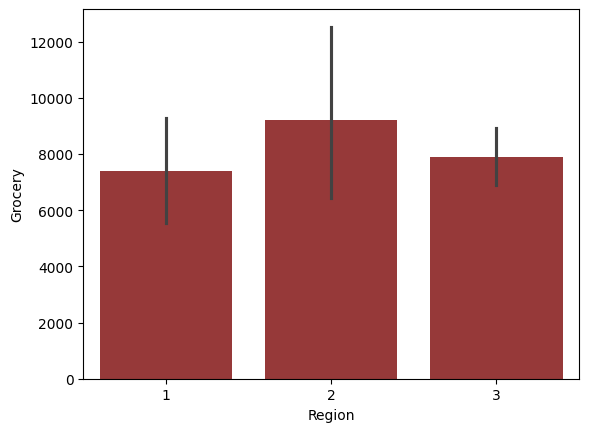

In [84]:
#visualization
sns.barplot(x='Region',y='Grocery',data=data,color='brown')

<Axes: xlabel='Region', ylabel='Milk'>

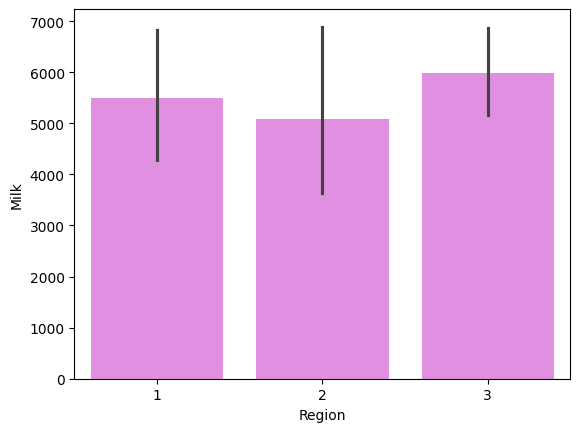

In [86]:
sns.barplot(x='Region',y='Milk',data=data,color='violet')

<Axes: xlabel='Region', ylabel='Fresh'>

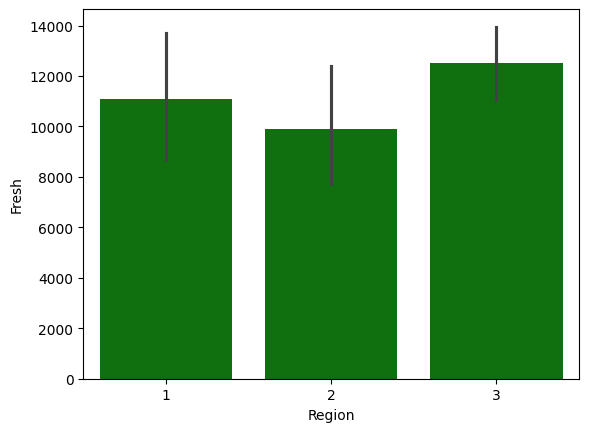

In [87]:
sns.barplot(x='Region',y='Fresh',data=data,color='green')

<Axes: xlabel='Channel', ylabel='Grocery'>

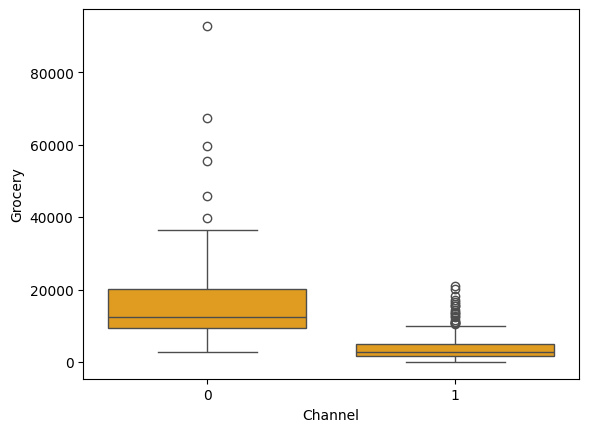

In [89]:
sns.boxplot(x='Channel',y='Grocery',data=data,color='orange')

<Axes: xlabel='Channel', ylabel='Milk'>

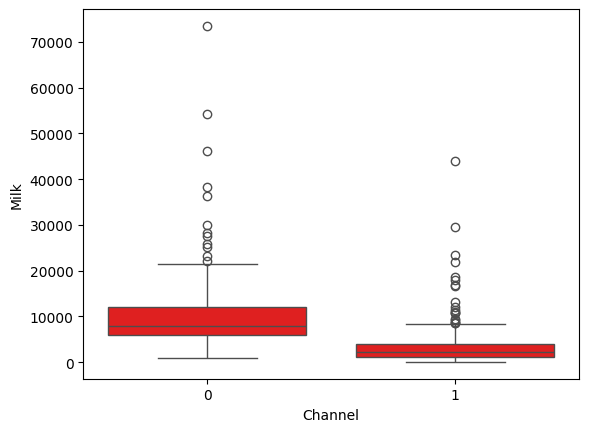

In [90]:
sns.boxplot(x='Channel',y='Milk',data=data,color='red')

<Axes: xlabel='Channel', ylabel='count'>

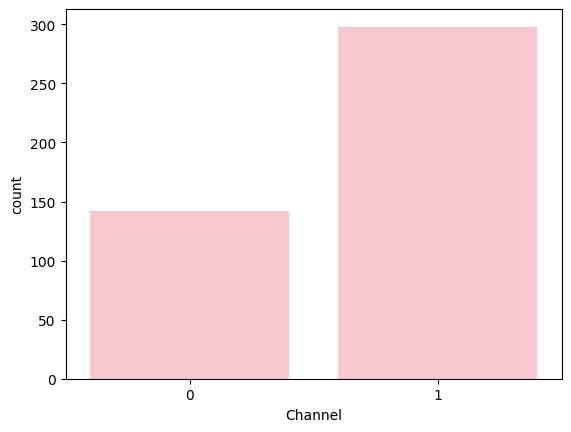

In [91]:
sns.countplot(x='Channel',data=data,color='pink')

In [85]:
x= data.drop('Channel',axis= 1)#independent

In [31]:
y = data['Channel'] #dependent

In [34]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [38]:
y.head(10)

0    2
1    2
2    2
3    1
4    2
5    2
6    2
7    2
8    1
9    2
Name: Channel, dtype: int64

In [42]:
#convert labels into binary values
y[y==2]=0
y[y==1]=1

In [44]:
#again preview the y label
y.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: Channel, dtype: int64

In [46]:
!pip install xgboost

In [56]:
#import xgboost package
import xgboost as xgb

In [58]:
#define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [60]:
#import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

#split x and y into test,train sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3,random_state=0)

In [69]:
 #import XGBClassifier class from xgboost package
from xgboost import XGBClassifier

In [73]:
#instatiate the classifier
params = {
    'objective': 'binary:logistic',  # Example parameter, adjust as needed
    'max_depth': 3,                  # Example parameter, adjust as needed
    # Add other parameters as needed
}
#instantiate the classifier
xgb_clf = XGBClassifier(**params)

In [75]:
#fit the classifier to training data
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
#alternatively view the parametrers of the xgb trained model
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [80]:
#make predictions on test data
y_pred= xgb_clf.predict(x_test)

In [82]:
#check accuracy score
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score:{0:0.4}'.format(accuracy_score(y_test,y_pred)))

XGBoost model accuracy score:0.9091
